In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


## Problem 1:
### There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance? 

In [3]:
#Read CSV (comma-separated) file into DataFrame
stocks= pd.read_csv('data_stocks.csv')
stocks.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
#Adding a new column 'NEW_DATE' in stocks dataframe 
stocks['NEW_DATE'] = pd.to_datetime(stocks['DATE'],unit='s')

In [5]:
#Creating a list of columns from stocks dataframe
cols = stocks.columns.tolist()

In [6]:
#Making 'NEW_DATE' as first column
cols = cols[-1:] + cols[:-1]

In [7]:
#Removing 'DATE' and 'SP500' columns
cols.remove('DATE')
cols.remove('SP500')

In [8]:
cols

['NEW_DATE',
 'NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EA',
 'NASDAQ.EBAY',
 'NASDAQ.EQIX',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NASDAQ.INCY',
 'NASDA

In [9]:
#Removing 'DATE' and 'SP500' from stocks dataframe
stocks.drop(columns=['DATE','SP500'],axis=1,inplace=True)
stocks.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,NEW_DATE
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 13:30:00
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 13:31:00
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 13:32:00
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 13:33:00
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 13:34:00


In [10]:
#Creating a df objects which has cols list column data from stocks dataframe
df = stocks[cols]
df.head()

,NEW_DATE,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [11]:
df.shape

(41266, 501)

In [12]:
#Setting NEW_DATE as index 
df.set_index('NEW_DATE',inplace=True)
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NEW_DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [13]:
#Creating transpose of the df dataframe
df_transpose = df.transpose()

In [14]:
df_transpose.head()

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:51:00,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.72,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.16,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.06,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.71,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.62,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47


In [15]:
#Creating an instance of PCA
pca_new = PCA(n_components=2)

In [16]:
#Fitting and tranforming the df_transpose dataframe
df_transpose_pca = pca_new.fit_transform(df_transpose)

In [17]:
#Return a tuple representing the dimensionality of df_transpose_pca DataFrame.
df_transpose_pca.shape

(500, 2)

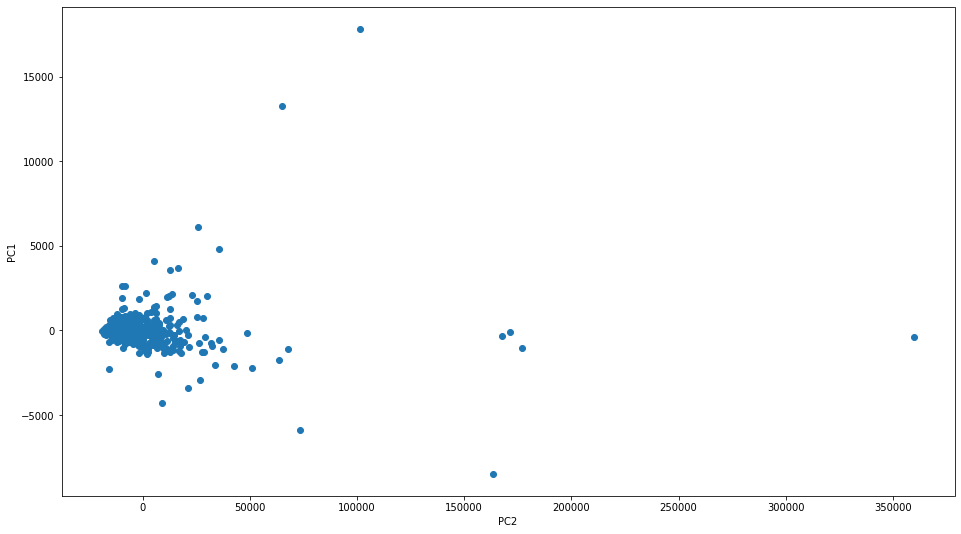

In [18]:
#Scatter Plot
plt.figure(figsize=(16,9))
plt.scatter(df_transpose_pca[:,0],df_transpose_pca[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

In [19]:
#Returns explained variance array
pca_new.explained_variance_

array([6.83663380e+08, 1.88968326e+06])

In [20]:
#Finding k_new and intertia_new list data for KMeans clustering using elbow method
k_new = []
inertia_new = []
for i in range(2,10):
    km_new=KMeans(n_clusters=i)
    km_new.fit(df_transpose)
    k_new.append(i)
    inertia_new.append(km_new.inertia_)

In [21]:
#inertia_new list data
inertia_new

[123006116341.59377,
 70077213281.75235,
 38215217146.89998,
 21196874808.88073,
 13067876275.570747,
 8602418066.634865,
 6386281534.156868,
 4965386287.61667]

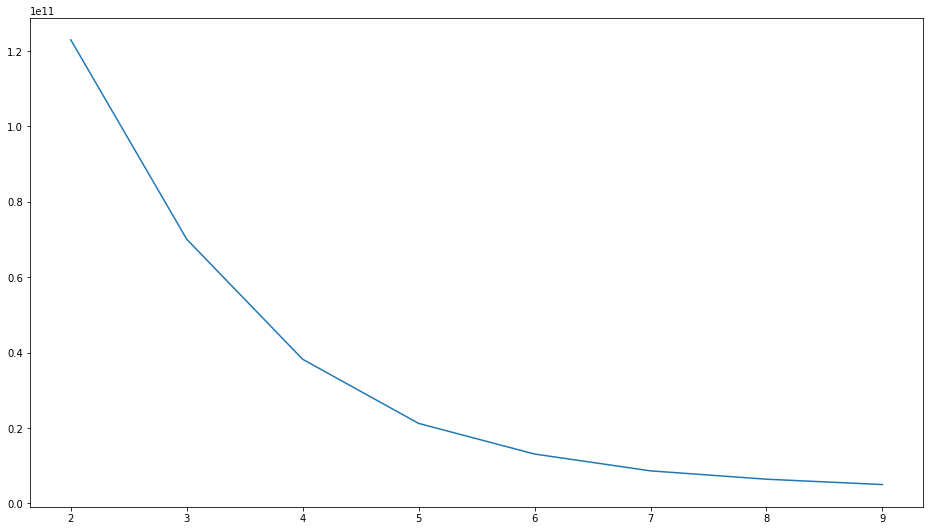

In [22]:
#Plot to find number of clusters (Elbow Method)
plt.figure(figsize=(16,9))
plt.plot(k_new,inertia_new)
plt.show()

In [23]:
#Initializing and fitting KMeans
km = KMeans(n_clusters = 5)
km.fit(df_transpose)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
#Predicted values using KMeans
y_predict_new = km.predict(df_transpose)

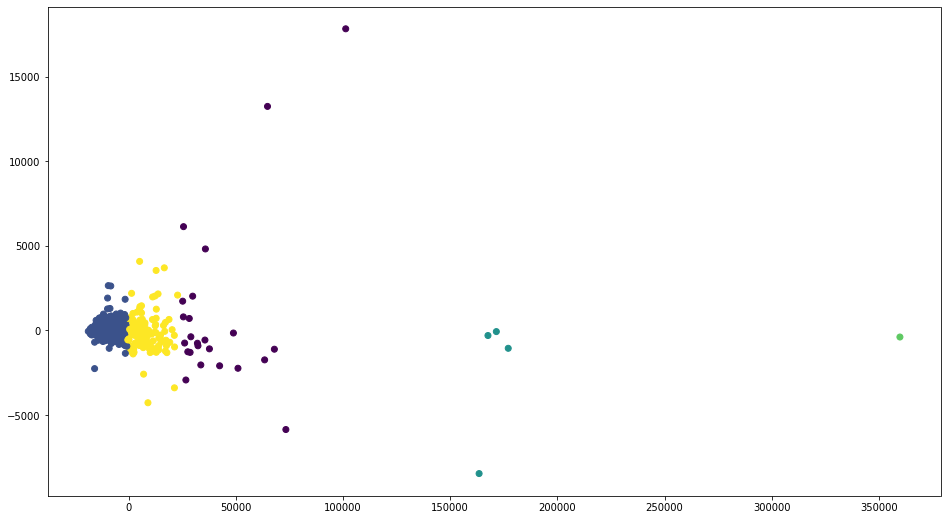

In [25]:
#Scatter Plot
plt.figure(figsize=(16,9))
plt.scatter(df_transpose_pca[:,0],df_transpose_pca[:,1],c=y_predict_new)
plt.show()

In [26]:
#Adding 'y_predict_new' values in df_transpose dataframe creating 'Y_PREDICT' column
df_transpose['Y_PREDICT'] = y_predict_new

In [27]:
#Returns 'Y_PREDICT' column containing counts of unique values in df_transpose dataframe.
df_transpose['Y_PREDICT'].value_counts()

1    338
4    133
0     24
2      4
3      1
Name: Y_PREDICT, dtype: int64

In [28]:
#Apparently similar performing stocks of Type-1 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==0]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AVGO,219.110,219.980,219.3900,219.300,219.1800,219.4900,219.7200,219.8700,219.820,219.2701,...,252.05,252.0700,252.0950,251.7900,251.915,252.1200,252.0100,251.7600,252.070,0
NASDAQ.BIIB,274.080,273.990,274.2750,273.590,273.5400,274.1300,273.8700,274.0500,273.870,274.3800,...,315.97,316.0500,316.0200,316.0000,316.200,316.5800,316.3200,316.3700,316.580,0
NASDAQ.CHTR,330.730,330.730,330.7300,330.730,330.7300,330.7300,330.7300,330.7300,330.730,330.7300,...,398.25,397.9700,397.9100,398.1400,398.230,398.2400,398.3300,397.9800,398.540,0
NASDAQ.EQIX,400.940,400.400,401.9850,401.500,399.7704,399.7704,401.0150,400.7900,400.150,399.7950,...,468.61,468.5750,468.1700,468.2700,468.240,468.1900,468.1200,467.9300,468.410,0
NASDAQ.ORLY,266.000,263.775,263.0850,262.690,260.6800,260.5600,257.4500,259.2300,259.470,259.8700,...,196.36,196.3100,196.2500,196.2100,196.160,196.0950,196.0650,196.0100,196.120,0
NASDAQ.REGN,388.000,390.160,389.8900,390.375,390.5144,390.7350,390.1050,390.1239,390.740,391.0800,...,496.09,496.6150,496.6100,496.5600,496.600,496.6300,496.7700,496.5900,496.900,0
NASDAQ.ULTA,285.510,285.980,285.3650,284.660,284.9000,284.9000,285.7600,285.7400,284.990,284.9500,...,220.42,220.4700,220.5300,220.6100,220.620,220.8150,221.0300,220.9750,221.010,0
NYSE.ADS,249.015,249.015,249.6400,249.800,249.9200,249.9300,249.9400,249.7300,249.930,249.9600,...,225.71,225.7050,225.7100,225.6200,225.535,225.4700,225.5100,225.3500,225.490,0
NYSE.AGN,238.720,238.720,238.8700,238.870,239.3000,239.5300,239.6500,239.6200,239.690,240.0800,...,229.10,229.1300,229.3100,229.2700,229.260,229.4300,229.4796,229.2600,229.320,0
NYSE.AZO,720.500,719.460,715.0100,712.270,708.0000,704.3200,703.5000,704.1500,704.150,706.1100,...,528.55,528.4100,528.5300,528.0500,528.135,528.2100,528.3550,528.1400,528.460,0


In [29]:
#Apparently similar performing stocks of Type-2 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==1]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.4700,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.7100,44.7200,44.7300,44.7400,44.7100,44.740,1
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.1900,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.6200,83.5800,83.690,1
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.4100,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.1450,47.1500,47.1500,47.1500,47.1350,47.150,1
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.9600,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.1300,45.1300,45.1300,45.1350,45.0650,45.120,1
NASDAQ.AMD,14.6100,14.7100,14.6400,14.6300,14.6700,14.6800,14.6563,14.6840,14.6942,14.6300,...,12.9900,12.9900,12.9950,12.9850,12.9850,12.9850,12.9700,12.9650,13.000,1
NASDAQ.ATVI,49.8500,49.9400,49.8600,49.9150,49.9150,49.9700,50.0000,50.0200,50.0100,50.0100,...,65.5700,65.5300,65.5600,65.5550,65.5800,65.5900,65.5400,65.4450,65.560,1
NASDAQ.BBBY,39.4300,39.6800,39.6000,39.5700,39.5500,39.5800,39.4900,39.5100,39.4950,39.4433,...,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.300,1
NASDAQ.CA,31.7800,31.7800,31.7650,31.8300,31.8300,31.8300,31.7900,31.8100,31.8100,31.8000,...,33.2100,33.2150,33.2200,33.2200,33.2000,33.2100,33.1900,33.1600,33.180,1
NASDAQ.CBOE,81.0300,81.2100,81.2100,81.1300,81.1200,81.2200,81.1600,81.1600,81.1600,81.1300,...,100.8800,100.8900,100.8800,100.8899,100.8900,100.8800,100.8600,100.8300,100.890,1
NASDAQ.CERN,58.8200,58.4950,58.4700,58.4200,58.6000,58.5200,58.5900,58.6100,58.5500,58.5300,...,67.7200,67.7300,67.6900,67.6700,67.7200,67.7300,67.7200,67.7100,67.780,1


In [30]:
#Apparently similar performing stocks of Type-3 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==2]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.31,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.01,979.81,979.445,980.60,2
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.30,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.67,938.13,937.680,939.33,2
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.25,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.47,953.88,953.465,955.24,2
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.61,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.67,1004.04,1003.310,1004.67,2


In [31]:
#Apparently similar performing stocks of Type-4 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==3]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.PCLN,1776.26,1779.4606,1777.55,1776.4301,1774.08,1775.0,1776.585,1777.01,1776.03,1775.5736,...,1850.46,1850.8,1851.52,1851.85,1851.015,1852.1401,1852.29,1852.2499,1852.08,3


In [32]:
#Apparently similar performing stocks of Type-5 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==4]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AAPL,143.6800,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.0100,163.8800,163.980,4
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.1400,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.0650,154.9600,155.160,4
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.3700,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.5200,106.4000,106.470,4
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.8200,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.4700,114.3300,114.460,4
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.6100,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.3300,142.1700,142.410,4
NASDAQ.AMGN,164.6300,164.6800,164.9050,164.7600,164.8500,164.9225,164.8200,164.7269,164.7050,164.7900,...,177.7400,177.8600,177.8600,177.8650,177.8512,177.7800,177.7600,177.6300,177.820,4
NASDAQ.CELG,124.8900,124.9900,125.0000,124.7300,124.8300,125.0800,125.1300,125.1700,125.1100,125.1000,...,138.6000,138.6800,138.7190,138.7500,138.7353,138.7799,138.8600,138.7350,138.985,4
NASDAQ.CME,119.3850,118.8100,118.8300,118.6800,118.9350,118.7800,118.9800,118.9600,119.0000,118.8100,...,125.9300,125.9900,126.0000,125.9600,125.9100,125.8900,125.8500,125.7800,125.800,4
NASDAQ.COST,167.7400,167.7760,168.0000,168.2000,168.0400,168.0950,168.0825,168.0100,167.9000,168.0440,...,156.7800,156.8800,156.8100,156.8000,156.8000,156.8200,156.8000,156.7300,156.740,4
NASDAQ.CTAS,126.8600,126.8600,126.9576,126.7000,126.8900,126.9500,126.8400,126.7200,126.8700,126.8800,...,135.1100,135.0700,135.0800,135.0700,134.9800,135.0800,134.9800,134.9000,135.010,4


## Problem 2:
    
### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [33]:
data_new = pd.read_csv('data_stocks.csv')
data_new.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [34]:
#drom 'DATE' and 'SP500' for PCA and Knn
data_new.drop(columns=['DATE','SP500'],axis=1,inplace=True)
data_new.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


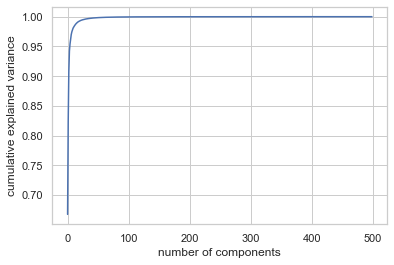

In [35]:
# Deterrmine the optimal number of components for PCA 
sns.set()
sns.set_style('whitegrid')
pca = PCA().fit(data_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [36]:
#From the above graph we see that we would need about 100 components to retain 100% variance 
#Applying PCA to reduce the number of dimensions from 502 to 2 for better data visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data_new)
X_transformed = pca.transform(data_new)
X_retransformed = pca.inverse_transform(X_transformed)
print('Explained Variance :', pca.explained_variance_ratio_ )
print('Transformed Feature shape :',X_transformed.shape)
print('Original Feature shape :', data_new.shape)
print('Restransformed Feature shape :', X_retransformed.shape)
print('PCA Components : ')
print(pca.components_ )

Explained Variance : [0.66751335 0.15499104]
Transformed Feature shape : (41266, 2)
Original Feature shape : (41266, 500)
Restransformed Feature shape : (41266, 500)
PCA Components : 
[[-1.34333205e-02 -2.04169538e-02 -3.84141465e-02 -2.27285986e-03
  -1.30494689e-02 -4.73353630e-02  2.12456088e-02 -3.06368273e-02
  -1.08318715e-02 -1.79727665e-03 -2.88819514e-02 -1.87758343e-01
  -2.52087119e-02 -6.83646306e-02  2.20332146e-02 -3.96270320e-02
  -2.94064521e-03 -3.03652452e-02 -2.60701775e-02 -9.83237576e-03
   1.65717926e-02 -9.09715317e-02 -1.25251591e-02 -4.23732308e-03
  -1.57179048e-02  4.00744767e-02  3.99341422e-03 -4.76329005e-03
  -2.24425413e-02 -2.30140730e-02  1.25286150e-02  8.58587800e-03
   9.64400970e-03  9.74813548e-04  1.65408932e-02 -5.09303583e-02
  -5.09549025e-03 -8.63819835e-02  4.47920628e-03 -1.37966163e-02
  -4.43446210e-03 -4.34231192e-02  1.00021956e-02 -4.98149689e-02
   2.86614597e-02 -1.58778619e-02 -4.12361386e-03 -2.64265760e-03
   4.94550357e-03  5.313

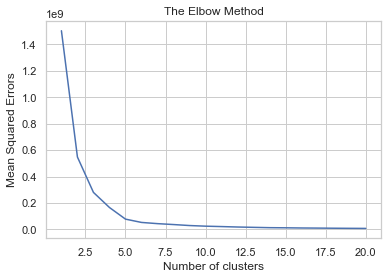

In [37]:
# Finding optimum number of clusters for KMEANS cluster using Elbow Method

wcss=[]
for i in range(1, 21):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
 kmeans.fit(X_transformed)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

In [38]:
# Optimum number of cluster from the elbow method is determined to be 5
# Applying K-Means Clustering to find stocks which are similar in performance
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = k_means.fit_predict(X_transformed)
labels = k_means.labels_
print("labels generated :\n",labels)

labels generated :
 [2 2 2 ... 3 3 3]


In [39]:
len(labels)

41266

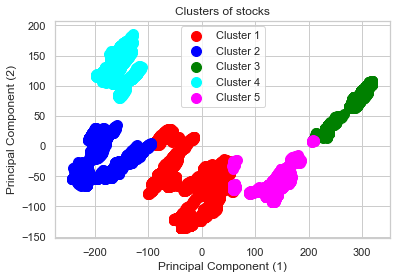

In [40]:
# Visualising the clusters
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100,c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100,c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100,c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100,c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100,c = 'magenta', label = 'Cluster 5')
## plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [41]:
#Adding 'Y_PREDICT' column in data_new dataframe
data_new['Y_PREDICT'] = y_kmeans

In [42]:
#Returns 'Y_PREDICT' column containing counts of unique values in data_new dataframe.
data_new['Y_PREDICT'].value_counts()

0    11744
1     8992
2     7011
4     6872
3     6647
Name: Y_PREDICT, dtype: int64

### There are 5 unique patterns that exists in historical stock data set, based on fluctuation in price ( Observed Using KMeans Clustering Elbow Method )

## Problem 3: 
 
### Identify which all stocks are moving together and which all stocks are different from each other.

In [43]:
df_new = pd.read_csv('data_stocks.csv')
df_new.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [44]:
#Shape
df_new.shape

(41266, 502)

In [45]:
#Removing 'DATE' and 'SP500' columns from df_new dataframe
df_new.drop(columns=['DATE','SP500'],inplace=True,axis=1)

In [46]:
#Listing all the df_new dataframe columns
category_cols = df_new.columns

In [47]:
#Creating the columns with the difference of the previous row 
for cat in category_cols:
    df_new["DIFF_"+ cat] = df_new[cat] - df_new[cat].shift(periods=1)

In [48]:
#new shape.
df_new.shape

(41266, 1000)

In [49]:
#Removing the category_cols list columns from df_new dataframe
df_new.drop(category_cols,axis=1,inplace=True)
df_new.head()

,DIFF_NASDAQ.AAL,DIFF_NASDAQ.AAPL,DIFF_NASDAQ.ADBE,DIFF_NASDAQ.ADI,DIFF_NASDAQ.ADP,DIFF_NASDAQ.ADSK,DIFF_NASDAQ.AKAM,DIFF_NASDAQ.ALXN,DIFF_NASDAQ.AMAT,DIFF_NASDAQ.AMD,...,DIFF_NYSE.WYN,DIFF_NYSE.XEC,DIFF_NYSE.XEL,DIFF_NYSE.XL,DIFF_NYSE.XOM,DIFF_NYSE.XRX,DIFF_NYSE.XYL,DIFF_NYSE.YUM,DIFF_NYSE.ZBH,DIFF_NYSE.ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0300,0.0200,0.6900,0.040,-0.0900,0.4300,0.080,-0.04,0.02,0.10,...,0.000,0.000,-0.29,0.00,0.00,0.02,0.00,-0.12,-0.230,0.000
2,-0.0500,-0.0099,-0.0950,-0.050,0.0725,-0.1400,-0.045,0.45,-0.10,-0.07,...,0.215,0.225,-0.02,0.10,-0.01,-0.02,-0.10,0.01,-0.070,0.015
3,0.0600,-0.0501,-0.1521,-0.030,-0.0725,-0.0228,-0.175,-0.49,-0.07,-0.01,...,-0.125,0.000,0.16,0.01,0.00,-0.01,0.04,0.13,0.000,0.015
4,0.1678,0.0200,-0.1929,0.035,-0.0800,0.2129,0.000,0.16,0.09,0.04,...,0.010,0.350,-0.14,-0.03,0.01,0.01,0.04,0.03,-0.005,-0.140


In [50]:
#Removing the rows which containd NaN
df_new.dropna(inplace=True)
df_new.head()

,DIFF_NASDAQ.AAL,DIFF_NASDAQ.AAPL,DIFF_NASDAQ.ADBE,DIFF_NASDAQ.ADI,DIFF_NASDAQ.ADP,DIFF_NASDAQ.ADSK,DIFF_NASDAQ.AKAM,DIFF_NASDAQ.ALXN,DIFF_NASDAQ.AMAT,DIFF_NASDAQ.AMD,...,DIFF_NYSE.WYN,DIFF_NYSE.XEC,DIFF_NYSE.XEL,DIFF_NYSE.XL,DIFF_NYSE.XOM,DIFF_NYSE.XRX,DIFF_NYSE.XYL,DIFF_NYSE.YUM,DIFF_NYSE.ZBH,DIFF_NYSE.ZTS
1,0.0300,0.0200,0.6900,0.040,-0.0900,0.4300,0.080,-0.04,0.02,0.10,...,0.0000,0.000,-0.29,0.00,0.00,0.02,0.00,-0.12,-0.230,0.000
2,-0.0500,-0.0099,-0.0950,-0.050,0.0725,-0.1400,-0.045,0.45,-0.10,-0.07,...,0.2150,0.225,-0.02,0.10,-0.01,-0.02,-0.10,0.01,-0.070,0.015
3,0.0600,-0.0501,-0.1521,-0.030,-0.0725,-0.0228,-0.175,-0.49,-0.07,-0.01,...,-0.1250,0.000,0.16,0.01,0.00,-0.01,0.04,0.13,0.000,0.015
4,0.1678,0.0200,-0.1929,0.035,-0.0800,0.2129,0.000,0.16,0.09,0.04,...,0.0100,0.350,-0.14,-0.03,0.01,0.01,0.04,0.03,-0.005,-0.140
5,0.0021,0.1200,0.1900,0.005,-0.0200,0.2199,-0.010,0.10,0.02,0.01,...,0.0125,-0.030,0.04,0.00,0.00,0.00,0.00,-0.07,0.155,-0.020


In [51]:
#Computes pairwise correlation of columns of df_new dataframe
df_new_corr = df_new.corr()
df_new_corr

,DIFF_NASDAQ.AAL,DIFF_NASDAQ.AAPL,DIFF_NASDAQ.ADBE,DIFF_NASDAQ.ADI,DIFF_NASDAQ.ADP,DIFF_NASDAQ.ADSK,DIFF_NASDAQ.AKAM,DIFF_NASDAQ.ALXN,DIFF_NASDAQ.AMAT,DIFF_NASDAQ.AMD,...,DIFF_NYSE.WYN,DIFF_NYSE.XEC,DIFF_NYSE.XEL,DIFF_NYSE.XL,DIFF_NYSE.XOM,DIFF_NYSE.XRX,DIFF_NYSE.XYL,DIFF_NYSE.YUM,DIFF_NYSE.ZBH,DIFF_NYSE.ZTS
DIFF_NASDAQ.AAL,1.000000,0.174426,0.217080,0.178742,0.123543,0.176964,0.157573,0.001607,0.201468,0.169037,...,0.170238,0.040174,-0.023792,0.043705,0.077091,0.041886,0.146242,0.139152,0.255040,0.091314
DIFF_NASDAQ.AAPL,0.174426,1.000000,0.418750,0.340841,0.134411,0.307407,0.216343,0.099733,0.426848,0.312322,...,0.161219,0.029748,-0.044910,0.072842,0.029744,0.078002,0.170238,0.140320,0.116605,0.117178
DIFF_NASDAQ.ADBE,0.217080,0.418750,1.000000,0.339840,0.139378,0.405820,0.158988,0.128689,0.436495,0.364518,...,0.166740,-0.022685,-0.015124,0.055081,-0.037262,0.035395,0.162710,0.175532,0.119406,0.149031
DIFF_NASDAQ.ADI,0.178742,0.340841,0.339840,1.000000,0.143097,0.257270,0.126521,0.118267,0.452126,0.364328,...,0.186068,0.033078,-0.013122,0.063393,0.020628,0.059339,0.167168,0.156105,0.070002,0.093062
DIFF_NASDAQ.ADP,0.123543,0.134411,0.139378,0.143097,1.000000,0.106176,0.302908,0.036192,0.115974,0.110412,...,0.058912,0.007332,0.031436,0.044890,0.061540,0.032289,0.122797,0.101765,0.058821,0.069449
DIFF_NASDAQ.ADSK,0.176964,0.307407,0.405820,0.257270,0.106176,1.000000,0.136093,0.115844,0.408567,0.271351,...,0.174889,0.023415,-0.009014,0.062099,0.041568,0.053731,0.173953,0.189018,0.094449,0.109624
DIFF_NASDAQ.AKAM,0.157573,0.216343,0.158988,0.126521,0.302908,0.136093,1.000000,0.057771,0.170260,0.060920,...,0.098182,0.038104,0.004849,0.019059,0.036353,0.031311,0.103299,-0.032800,0.156012,0.110853
DIFF_NASDAQ.ALXN,0.001607,0.099733,0.128689,0.118267,0.036192,0.115844,0.057771,1.000000,0.112638,0.101642,...,0.088928,0.026593,0.013280,0.062252,0.025694,0.244332,0.090905,0.084275,-0.010279,0.109212
DIFF_NASDAQ.AMAT,0.201468,0.426848,0.436495,0.452126,0.115974,0.408567,0.170260,0.112638,1.000000,0.451389,...,0.185196,0.009664,-0.060509,0.080059,0.002512,0.055420,0.177074,0.170635,0.093555,0.110818
DIFF_NASDAQ.AMD,0.169037,0.312322,0.364518,0.364328,0.110412,0.271351,0.060920,0.101642,0.451389,1.000000,...,0.148171,0.020307,-0.056275,0.055237,0.000723,0.024592,0.102351,0.140195,0.091157,0.074049


### By creating a correlation matrix we can determine which two stocks are highly correlated to each other.and intuition is those having higher correlation will move together.